<a href="https://colab.research.google.com/github/soleildeminuit/AI-Samhallsplanering-Course/blob/main/scripts/AI_Samhallsplanering_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip Install Packages

In [2]:
!pip install rasterio
!pip install geopandas
!pip install requests


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.6/20.6 MB 38.8 MB/s eta 0:00:00


# H√§mta geodata

***H√§r √§r den f√∂rsta textcellen***

In [ ]:
import requests
import zipfile
import io
import os

# Lista med URLs f√∂r de filer som ska laddas ner
urls = [
    "https://www.scb.se/contentassets/3443fea3fa6640f7a57ea15d9a372d33/shape_svenska_220223.zip",
    "https://www.scb.se/contentassets/923c3627a8a042a5b9215e8ff3bde0a3/deso_2018_2021-10-21.zip",
    "https://www.scb.se/contentassets/e3b2f06da62046ba93ff58af1b845c7e/regso_2018_v2.zip"
]

# Skapa katalogen f√∂r att spara nerladdade filer
os.makedirs('/content/sample_data/geodata', exist_ok=True)

for url in urls:
    response = requests.get(url)

    # Extrahera ZIP-filen
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        zip_file.extractall('/content/sample_data/geodata')

        # Extrahera alla inre ZIP-filer
        for file in zip_file.namelist():
            if file.endswith('.zip'):
                with zipfile.ZipFile(io.BytesIO(zip_file.read(file))) as inner_zip_file:
                    inner_zip_file.extractall('/content/sample_data/geodata')


--2023-11-24 14:19:11--  https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp [following]
--2023-11-24 14:19:12--  https://raw.githubusercontent.com/soleildeminuit/AI-Samhallsplanering-Course/main/data/raw/Kommun_Sweref99TM_region.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172404 (168K) [application/octet-stream]
Saving to: ‚ÄòKommun_Sweref99TM_region.shp.3‚Äô

Kommun_Sweref99TM_r 100%[==============

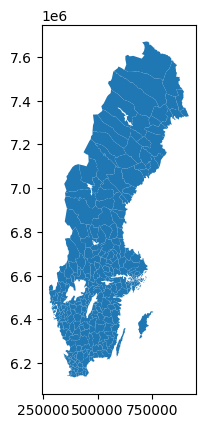

In [ ]:
# !pip install geopandas
# !pip install descartes
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Ladda ner shape-filen
# !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shp

# # L√§s in shape-filen
# try:
#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")
# except ValueError:
#     # Ladda ner filerna som saknas
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Kommun_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.cpg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.dbf
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.prj
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Lan_Sweref99TM_region.shx
#     #
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/DeSO_2018_v2.gpkg
#     !wget https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/RegSO_2018_v2.gpkg

#     shapefile = gpd.read_file("Kommun_Sweref99TM_region.shp")

# # Rita kartan
# shapefile.plot()
# plt.show()


# H√§mta rasterdata

In [7]:
import requests
from io import BytesIO
import rasterio
import geopandas as gpd

# Lista med filnamn i katalogen
filnamn_lista = ["Stockholm_2017_2022.tif",
                 "Forskolor_ht23_sweref.gpkg",
                 "tradtackning_binar3m_√ñrebro.tif"]  # Uppdatera med faktiska filnamn

# Bas-URL f√∂r GitHub-repot
base_url = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/'

for filnamn in filnamn_lista:
    url = base_url + filnamn

    # Ladda ner filen
    response = requests.get(url)
    response.raise_for_status()

    # Spara filen lokalt i Colab
    file_path = f'/content/sample_data/{filnamn}'
    with open(file_path, 'wb') as file:
        file.write(response.content)

    # Kontrollera filtyp och l√§s in data d√§refter
    if filnamn.endswith('.tif'):
        # L√§s in rasterdata (GeoTIFF) med rasterio
        with rasterio.open(file_path) as src:
            raster_data = src.read(1)
            # Hantera rasterdata h√§r...

    elif filnamn.endswith('.gpkg'):
        # L√§s in vektordata (GeoPackage) med geopandas
        vector_data = gpd.read_file(file_path)
        # Hantera vektordata h√§r...

    else:
        print(f'Filformat f√∂r {filnamn} st√∂ds inte.')


<ipython-input-28-2d04af81634a>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))


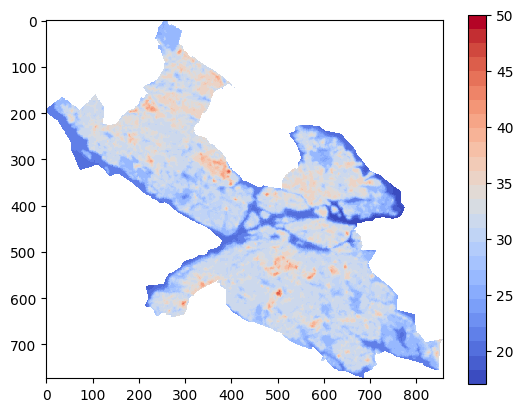

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:data = src.read(1)

# Konvertera icke-v√§rden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera f√§rgskalan baserat p√• de faktiska v√§rdena i datafilen
vmin = np.nanmin(data)
vmax = 50

# Skapa en lista med f√§rgkoder
cmap_custom = ["#436db0", "#5082bb", "#6095c5", "#71a9cf", "#83b9d8", "#97c9e0", "#aad8e9", "#bde2ee", "#cfebf3", "#e1f3f6", "#ecf8e2", "#f7fcce", "#fffcbb", "#fff1aa", "#fee79a", "#fed989", "#fec779", "#fdb668", "#fba15b", "#f88b51", "#f57446", "#e34932", "#d93328", "#c82227", "#b71126", "#a50026"]

# Anv√§nd f√§rgkartan
cmap = plt.cm.get_cmap('coolwarm', len(cmap_custom))

# Plotta marktemperaturerna med anpassad f√§rgs√§ttning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()



# V√§rmekarta

<ipython-input-7-103deb662113>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 256)


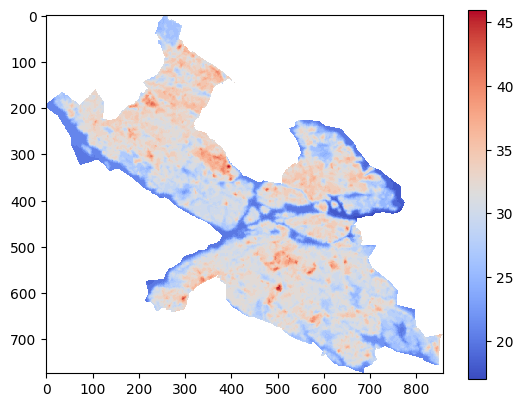

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)

# Konvertera icke-v√§rden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera f√§rgskalan baserat p√• de faktiska v√§rdena i datafilen
vmin = np.nanmin(data)
vmax = np.nanmax(data)
cmap = plt.cm.get_cmap('coolwarm', 256)

# Plotta marktemperaturerna med anpassad f√§rgs√§ttning
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
plt.colorbar()
plt.show()

#Sj√§lvklart! H√§r √§r en fullst√§ndig prompt som du kan anv√§nda f√∂r att √•terskapa kartan:

#Ladda in GeoTIFF-datafilen med hj√§lp av rasterio.
#Anv√§nd numpy f√∂r att konvertera icke-v√§rden till NaN.
#Definiera f√§rgskalan baserat p√• de faktiska v√§rdena i datafilen.
#Anv√§nd matplotlib f√∂r att plotta marktemperaturerna med den anpassade f√§rgs√§ttningen.


F√∂r att skapa ovanst√•ende Pythonkod beh√∂ver du en prompt som beskriver f√∂ljande steg:

1. **Ladda Geospatial Data fr√•n en GeoTIFF-fil:**
   - Starta med att ladda geospatial data f√∂r Stockholm fr√•n en GeoTIFF-fil som t√§cker √•ren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Behandla omr√•den i datan d√§r information saknas (NoData-v√§rden) genom att ers√§tta dessa med 'NaN' (Not a Number) f√∂r att undvika felaktig tolkning av datan.

3. **St√§ll in F√§rgskalan f√∂r V√§rmekartan:**
   - Best√§m den l√§gsta v√§rdet i datan (som inte √§r 'NaN') f√∂r att anv√§nda som minsta v√§rde p√• f√§rgskalan.
   - S√§tt ett maximalt v√§rde f√∂r f√§rgskalan, exempelvis 50.

4. **Skapa en Anpassad F√§rgkarta:**
   - Definiera en lista av f√§rgkoder som ska anv√§ndas f√∂r att visualisera olika v√§rden i datan. Denna lista b√∂r inneh√•lla en serie av f√§rgkoder i hexadecimal format.

5. **Anv√§nd en Inbyggd F√§rgkarta f√∂r Plottning:**
   - Anv√§nd en inbyggd f√§rgkarta (till exempel 'coolwarm') och justera den efter antalet f√§rger i den anpassade f√§rgkartan.

6. **Plotta V√§rmekartan:**
   - Visa datan som en v√§rmekarta med den anpassade f√§rgs√§ttningen. Anv√§nd de definierade minsta och st√∂rsta v√§rdena f√∂r f√§rgskalan och till√§mpa en interpolering f√∂r att j√§mna ut √∂verg√•ngarna mellan f√§rger.

7. **Visa en F√§rgskala och Plotten:**
   - Inkludera en f√§rgskala som visar hur olika f√§rger korrelerar med datans v√§rden.
   - Visa den slutliga plotten.

Den h√§r prompten beskriver processen f√∂r att skapa en v√§rmekarta av geospatial data med anpassad f√§rgs√§ttning, d√§r datan laddas fr√•n en GeoTIFF-fil och NoData-v√§rden hanteras korrekt. Prompten fokuserar p√• att visualisera data med specifik f√§rgs√§ttning och inkluderar inte behandling av ytterligare datak√§llor eller komplexa geospatiala analyser.

# V√§rmekarta med f√∂rskolor


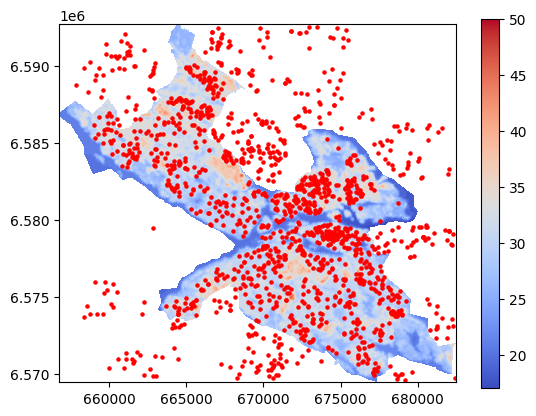

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box

# Ladda in GeoTIFF-data
with rasterio.open('/content/sample_data/Stockholm_2017_2022.tif') as src:
    data = src.read(1)
    left, bottom, right, top = src.bounds

# Konvertera icke-v√§rden till NaN
data = np.where(data == src.nodata, np.nan, data)

# Definiera f√§rgskalan
vmin = np.nanmin(data)
vmax = 50

# Plotta marktemperaturerna med inbyggd f√§rgkarta
fig, ax = plt.subplots()
img = ax.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax, interpolation='nearest', extent=[left, right, bottom, top])
fig.colorbar(img)

# Ladda in GeoPackage-data
fp = '/content/sample_data/Forskolor_ht23_sweref.gpkg'
data = gpd.read_file(fp)

# Skapa en GeoDataFrame med bounding box
bbox = gpd.GeoDataFrame(geometry=[box(left, bottom, right, top)], crs=data.crs)

# G√∂r en spatial join
data_within_bbox = gpd.sjoin(data, bbox, predicate='within')

# Plotta f√∂rskolorna med samma axel
data_within_bbox.plot(ax=ax, color='red', markersize=5)

# Visa plotten
plt.show()

# Kontrollera att det finns data att plotta
if data.size > 0:
  # Spara figuren som en pdf
  fig.savefig('karta.pdf', format='pdf')
else:
  print('Inga data att plotta.')


Absolut, prompten kan formuleras p√• ett s√§tt som beskriver processen utan att g√• in p√• detaljer om specifika programmeringsbibliotek. H√§r √§r en f√∂renklad, icke-teknisk beskrivning:

1. **√ñppna och L√§s en Satellitkarta √∂ver Stockholm:**
   - B√∂rja med att √∂ppna en satellitkarta √∂ver Stockholm fr√•n en fil. Denna karta visar geografiska data fr√•n √•ren 2017 till 2022.

2. **Hantera Saknade Data:**
   - Om det finns n√•gra omr√•den p√• kartan d√§r data saknas, se till att dessa omr√•den inte inkluderas i vidare analys.

3. **Skapa en V√§rmekarta:**
   - Anv√§nd kartan f√∂r att skapa en v√§rmekarta som visar olika temperaturer eller andra relevanta m√§tv√§rden √∂ver Stockholm. V√§lj f√§rger som tydligt visar variationer i datan.

4. **Ladda Punkter f√∂r F√∂rskolor:**
   - Ladda in en annan fil som inneh√•ller information om positioner f√∂r f√∂rskolor i Stockholm.

5. **Anpassa F√∂rskolepositionerna till Kartan:**
   - Justera informationen om f√∂rskolor s√• att den endast visar de som ligger inom det omr√•de som din satellitkarta t√§cker.

6. **Kombinera V√§rmekartan med F√∂rskolepositionerna:**
   - L√§gg till mark√∂rer f√∂r f√∂rskolorna p√• din v√§rmekarta. Dessa b√∂r vara tydligt synliga och skilja sig i f√§rg fr√•n v√§rmekartan.

7. **Visa den F√§rdiga Kartan:**
   - N√§r v√§rmekartan och f√∂rskolepositionerna har kombinerats, visa den slutgiltiga kartan. Denna karta ska nu illustrera b√•de geografiska data fr√•n satellitbilden och placeringen av f√∂rskolor i Stockholm.

Denna beskrivning ger en √∂versikt √∂ver processen f√∂r att skapa en kombinerad karta med b√•de satellitdata och punktdata f√∂r f√∂rskolor, utan att g√• in p√• programmeringsdetaljer. Det g√∂r det l√§ttare f√∂r en icke-programmerare att f√∂rst√• och beskriva processen.

# Tr√§dt√§ckningsdata (Boverket)
https://www.boverket.se/sv/om-boverket/publicerat-av-boverket/nyheter/tradtackning/

H√§mta data:

https://www.boverket.se/sv/samhallsplanering/sa-planeras-sverige/planeringsfragor/ekosystemtjanster/tradtackning/

---
Tr√§d i den byggda milj√∂n har stor betydelse f√∂r m√•nga ekosystemtj√§nster och f√∂r klimatanpassning av st√§der och t√§torter. Tr√§d bidrar till att s√§nka temperaturer varma dagar och tar hand om dagvatten. Boverket har d√§rf√∂r tillsammans med Metria gjort en nationell kartl√§ggning av tr√§dt√§ckning i st√§der och t√§torter som kan anv√§ndas av kommuner, l√§nsstyrelser, f√∂retag och myndigheter.

## Filinformation

In [ ]:
import pandas as pd

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# L√§s in filen
xl = pd.ExcelFile(file_path)

# Skriv ut alla flikar och deras kolumner
for sheet_name in xl.sheet_names:
    print(f"Flik: {sheet_name}")
    df = xl.parse(sheet_name)
    print(f"Kolumner: {df.columns.tolist()}\n")

# skriv pythonkod f√∂r att l√§sa filen file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx' och analysera vilka flikar som finns och respektive fliks kolumner. Filens dokumentation finner du nedan###Statistik √∂ver tr√§dt√§ckning
# F√∂r att kunna f√• en nationell bild √∂ver tr√§dt√§ckningen i t√§torter har Boverket l√•tit ta fram tr√§dt√§ckningsstatistik. Statistiken √•terfinns i Exceldokumentet nedan och omfattar f√∂r de ber√∂rda t√§torterna f√∂ljande information:

# Tr√§dt√§ckningen inom t√§tortsgr√§nsen, (Flik tradtackning_tatorter)
# Tr√§dt√§ckning f√∂r t√§tortsn√§ra gr√§ns med en buffertzon om 1 kilometer (fliken tradtackning_tatorter_buff1000).
# Tr√§dt√§ckning i varje stadsdel eller demografiskt statistikomr√•de (DeSo) inom t√§tortsgr√§ns (Fliken DeSO_2018_v2_urval_tradtackning) inneh√•ller information om f√∂r hela DeSOn inom omfattade t√§tortsn√§ra gr√§ns med buffertzon 1 kilometer.
# I varje flik finns ett antal kolumner.

# Kolumn T√§tort area [ha] visar den totala arealen i hektar f√∂r omr√•det. Kolumn Tr√§dt√§ckning area [ha] visar den totala tr√§dt√§ckningen i hektar f√∂r aktuellt omr√•de.
# Kolumn Tr√§dt√§ckning andel visar den procentuella tr√§dt√§ckningen (areal i kvadratmeter).
# Kolumn Tr√§dt√§ckning area [kvm] visar total tr√§dt√§ckning i kvadratmeter f√∂r omr√•det.
# Kolumn Tr√§dt√§ckning procent [%] visar den procentuella tr√§dt√§ckningen.


Flik: tradtackning_tatorter
Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Tr√§dt√§ckning area [ha]', 'T√§tort area [ha]', 'Tr√§dt√§ckning procent [%]']

Flik: tradtackning_tatorter_buff1000 
Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Tr√§dt√§ckning area [ha]', 'T√§tort area [ha]', 'Tr√§dt√§ckning procent [%]']

Flik: DeSO_2018_v2_urval_tradtackning
Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Tr√§dt√§ckning area [kvm]', 'Tr√§dt√§ckning procent [%]']



In [ ]:
import pandas as pd

# Ladda in Excelfilen f√∂r att analysera dess inneh√•ll
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
excel_data = pd.ExcelFile(file_path)

# Visa namnen p√• flikarna i Excelfilen
sheet_names = excel_data.sheet_names

# L√§sa in datan fr√•n varje flik f√∂r att f√• en √∂verblick
tradtackning_tatorter_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter')
tradtackning_tatorter_buff1000_df = pd.read_excel(excel_data, sheet_name='tradtackning_tatorter_buff1000 ')
deso_2018_df = pd.read_excel(excel_data, sheet_name='DeSO_2018_v2_urval_tradtackning')



## Analys av Tr√§dt√§ckningsgrad per T√§tort i G√∂teborgs kommun

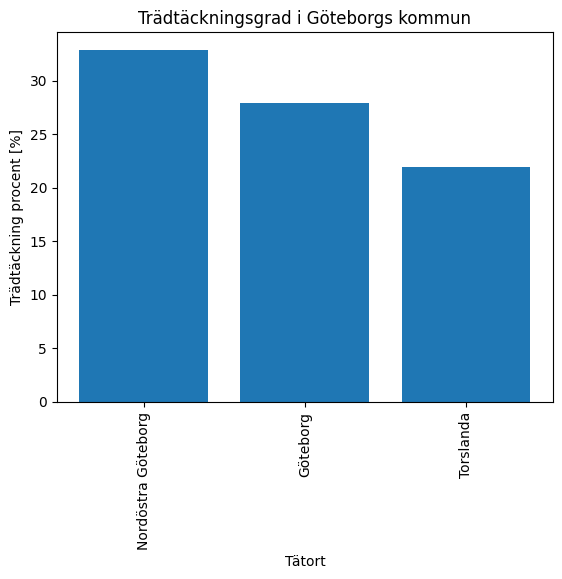

In [ ]:
# F√∂r att skapa ett diagram √∂ver tr√§dt√§ckningsgrad i alla stadsdelar i G√∂teborgs kommun fr√•n fliken ‚Äòtradtackning_tatorter‚Äô kan du anv√§nda f√∂ljande Python-kod:

# Python
# AI-genererad kod. Granska och anv√§nd noggrant. Mer information om vanliga fr√•gor och svar.

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'

# L√§s in filen
xl = pd.ExcelFile(file_path)

# L√§s in datan fr√•n fliken 'tradtackning_tatorter'
df = xl.parse('tradtackning_tatorter')

# Skapa en ny DataFrame med endast data fr√•n G√∂teborgs kommun
gbg_df = df[df['KOMMUNNAMN'] == 'G√∂teborg']

# Skapa stapeldiagram
plt.bar(gbg_df['TATORT'], gbg_df['Tr√§dt√§ckning procent [%]'])
plt.title("Tr√§dt√§ckningsgrad i G√∂teborgs kommun")
plt.xlabel("T√§tort")
plt.ylabel("Tr√§dt√§ckning procent [%]")
plt.xticks(rotation=90)
plt.show()
# F√∂r att skapa diagrammet anv√§nder vi biblioteken pandas och matplotlib. Vi l√§ser in Excelfilen p√• den angivna URL:en och l√§ser sedan in datan fr√•n fliken ‚Äòtradtackning_tatorter‚Äô. Vi skapar sedan en ny DataFrame med endast data fr√•n G√∂teborgs kommun genom att filtrera p√• kolumnen KOMMUNNAMN. Vi skapar sedan ett stapeldiagram som visar tr√§dt√§ckningsgraden i varje t√§tort i G√∂teborgs kommun. Diagrammet visas i ett separat f√∂nster.
# Hoppas detta hj√§lper!
# Jag ger dig utdata fr√•n ditt skript, nedan.
# Skapa Pythonskript som anv√§nder dessa data f√∂r att skapa ett diagram √∂ver tr√§dt√§ckningsgrad i alla stadsdelar i G√∂teborgs kommun
# Anv√§nd bara fliken 'tradtackning_tatorter'
# ###Flik: tradtackning_tatorter
# Kolumner: ['TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Tr√§dt√§ckning area [ha]', 'T√§tort area [ha]', 'Tr√§dt√§ckning procent [%]']

# Flik: tradtackning_tatorter_buff1000
# Kolumner: ['OID_', 'TARGET_FID', 'TATORTSKOD', 'TATORT', 'KOMMUN', 'KOMMUNNAMN', 'LAN', 'LANNAMN', 'Tr√§dt√§ckning area [ha]', 'T√§tort area [ha]', 'Tr√§dt√§ckning procent [%]']

# Flik: DeSO_2018_v2_urval_tradtackning
# Kolumner: ['deso', 'kommun', 'lan', 'kommunnamn', 'lannamn', 'version', 'DeSO area [kvm]', 'Tr√§dt√§ckning area [kvm]', 'Tr√§dt√§ckning procent [%]']


## Analys av Tr√§dt√§ckningsgrad per Deso i G√∂teborgs kommun

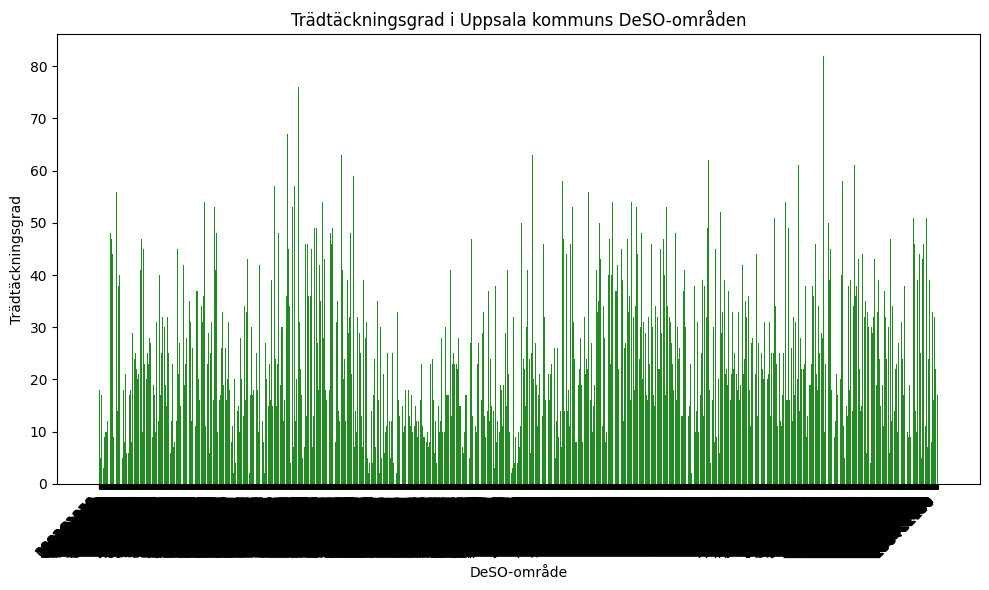

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# L√§s in Excelfilen fr√•n den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data f√∂r Uppsala kommuns DeSO-omr√•den
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett stapeldiagram f√∂r tr√§dt√§ckningsgraden
plt.figure(figsize=(10, 6))
plt.bar(uppsala_deso_df['deso'], uppsala_deso_df['Tr√§dt√§ckning procent [%]'], color='forestgreen')
plt.xlabel('DeSO-omr√•de')
plt.ylabel('Tr√§dt√§ckningsgrad')
plt.title('Tr√§dt√§ckningsgrad i Uppsala kommuns DeSO-omr√•den')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Visa diagrammet
plt.show()


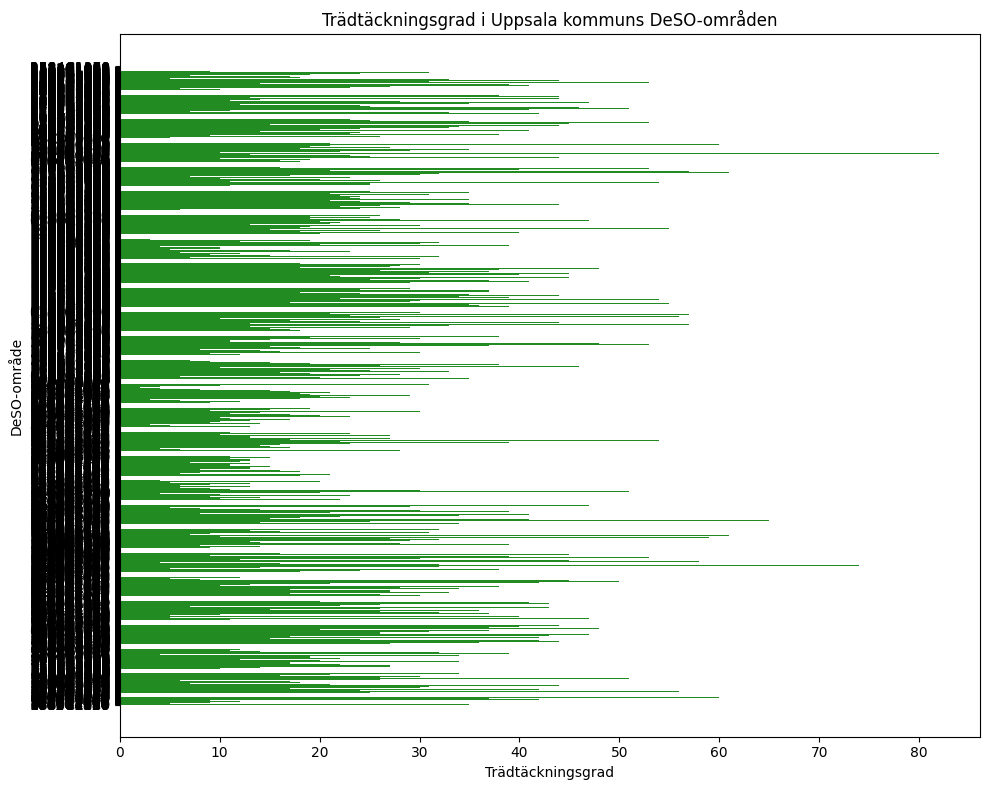

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# L√§s in Excelfilen fr√•n den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data f√∂r Uppsala kommuns DeSO-omr√•den
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Skapa ett horisontellt stapeldiagram f√∂r tr√§dt√§ckningsgraden
plt.figure(figsize=(10, 8))
plt.barh(uppsala_deso_df['deso'], uppsala_deso_df['Tr√§dt√§ckning procent [%]'], color='forestgreen')
plt.xlabel('Tr√§dt√§ckningsgrad')
plt.ylabel('DeSO-omr√•de')
plt.title('Tr√§dt√§ckningsgrad i Uppsala kommuns DeSO-omr√•den')
plt.tight_layout()

# Visa diagrammet
plt.show()
# Oj, det blev v√§ldigt m√•nga omr√•den l√§ngs x-axeln, texterna blev ihoptryckta.
# Har du ett f√∂rslag p√• en b√§ttre form av visualisering av m√•nga omr√•den?
# Genererar svar √•t dig‚Ä¶

# Absolut! Om vi har m√•nga omr√•den l√§ngs x-axeln kan det vara sv√•rt att l√§sa texten tydligt. Ett alternativ √§r att anv√§nda en horisontell stapeldiagram d√§r varje stapel representerar ett DeSO-omr√•de. L√•t mig uppdatera koden f√∂r att skapa en s√•dan visualisering:

### Ranking av Tr√§dt√§ckningsgrad per T√§tort i G√∂teborgs kommun

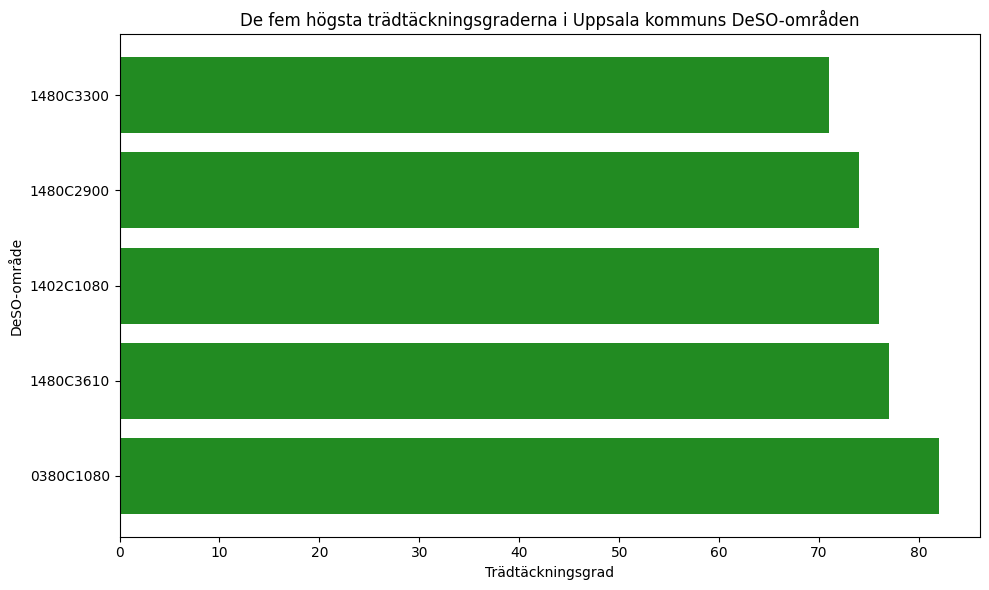

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# L√§s in Excelfilen fr√•n den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Extrahera data f√∂r Uppsala kommuns DeSO-omr√•den
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning']

# Sortera omr√•den efter tr√§dt√§ckningsgrad och v√§lj de fem h√∂gsta
top_5_deso_df = uppsala_deso_df.nlargest(5, 'Tr√§dt√§ckning procent [%]')

# Skapa ett horisontellt stapeldiagram f√∂r de fem h√∂gsta tr√§dt√§ckningsgraderna
plt.figure(figsize=(10, 6))
plt.barh(top_5_deso_df['deso'], top_5_deso_df['Tr√§dt√§ckning procent [%]'], color='forestgreen')
plt.xlabel('Tr√§dt√§ckningsgrad')
plt.ylabel('DeSO-omr√•de')
plt.title('De fem h√∂gsta tr√§dt√§ckningsgraderna i Uppsala kommuns DeSO-omr√•den')
plt.tight_layout()

# Visa diagrammet
plt.show()

# V√§lj bara de fem omr√•dena med st√∂rst t√§ckningsgrad
# Genererar svar √•t dig‚Ä¶

# Sj√§lvklart! L√•t oss begr√§nsa visualiseringen till de fem omr√•den med h√∂gst tr√§dt√§ckningsgrad. H√§r √§r den uppdaterade koden:

# Nu b√∂r vi ha en tydlig visualisering som visar de fem omr√•dena
# med h√∂gst tr√§dt√§ckningsgrad. üå≥üìä


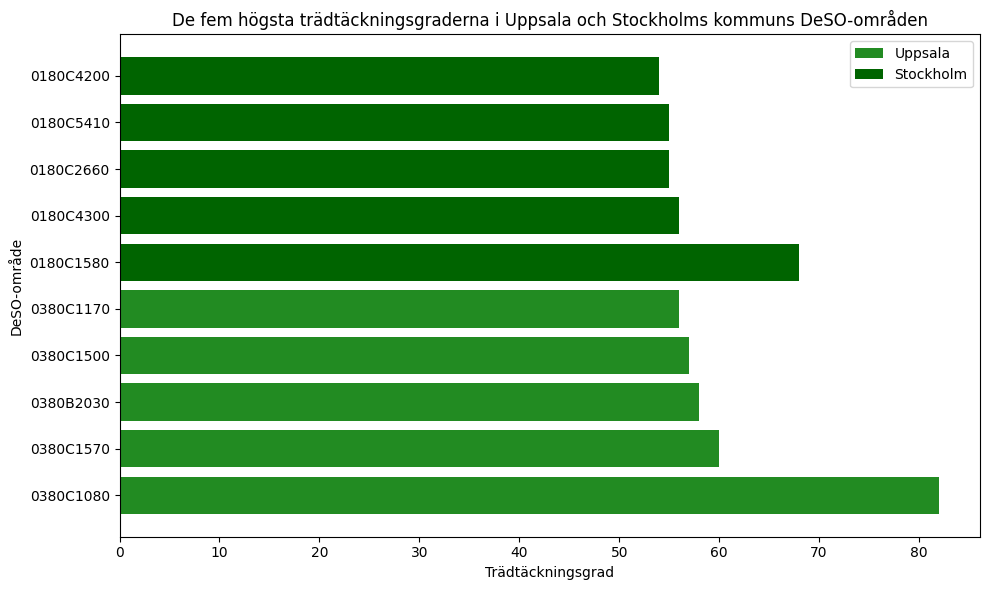

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# L√§s in Excelfilen fr√•n den angivna URL:en
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning-tatorter-och-deso.xlsx'
df_dict = pd.read_excel(file_path, sheet_name=None)

# Filtrera fram data f√∂r Uppsala kommun
uppsala_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Uppsala"')

# Sortera omr√•den efter tr√§dt√§ckningsgrad och v√§lj de fem h√∂gsta
top_5_uppsala_deso_df = uppsala_deso_df.nlargest(5, 'Tr√§dt√§ckning procent [%]')

# Filtrera fram data f√∂r Stockholms kommun
stockholm_deso_df = df_dict['DeSO_2018_v2_urval_tradtackning'].query('kommunnamn == "Stockholm"')

# Sortera omr√•den efter tr√§dt√§ckningsgrad och v√§lj de fem h√∂gsta
top_5_stockholm_deso_df = stockholm_deso_df.nlargest(5, 'Tr√§dt√§ckning procent [%]')

# Skapa ett gemensamt stapeldiagram f√∂r de tv√• kommunerna
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_5_uppsala_deso_df['deso'], top_5_uppsala_deso_df['Tr√§dt√§ckning procent [%]'], color='forestgreen', label='Uppsala')
ax.barh(top_5_stockholm_deso_df['deso'], top_5_stockholm_deso_df['Tr√§dt√§ckning procent [%]'], color='darkgreen', label='Stockholm')
ax.set_xlabel('Tr√§dt√§ckningsgrad')
ax.set_ylabel('DeSO-omr√•de')
ax.set_title('De fem h√∂gsta tr√§dt√§ckningsgraderna i Uppsala och Stockholms kommuns DeSO-omr√•den')
ax.legend()
plt.tight_layout()

# Visa diagrammet
plt.show()
# G√∂r om f√∂ljande Pythonskript s√• att de tv√• kommunernas respektiva datav√§rden f√∂rst filtreras ut, d√§refter r√§knas topp 5 ut, utifr√•n respektive kommuns datav√§rden (som du filtrerat fram)###import pandas as pd
# import matplotlib.pyplot as plt


## Tr√§dt√§ckningsdata som rasterdata

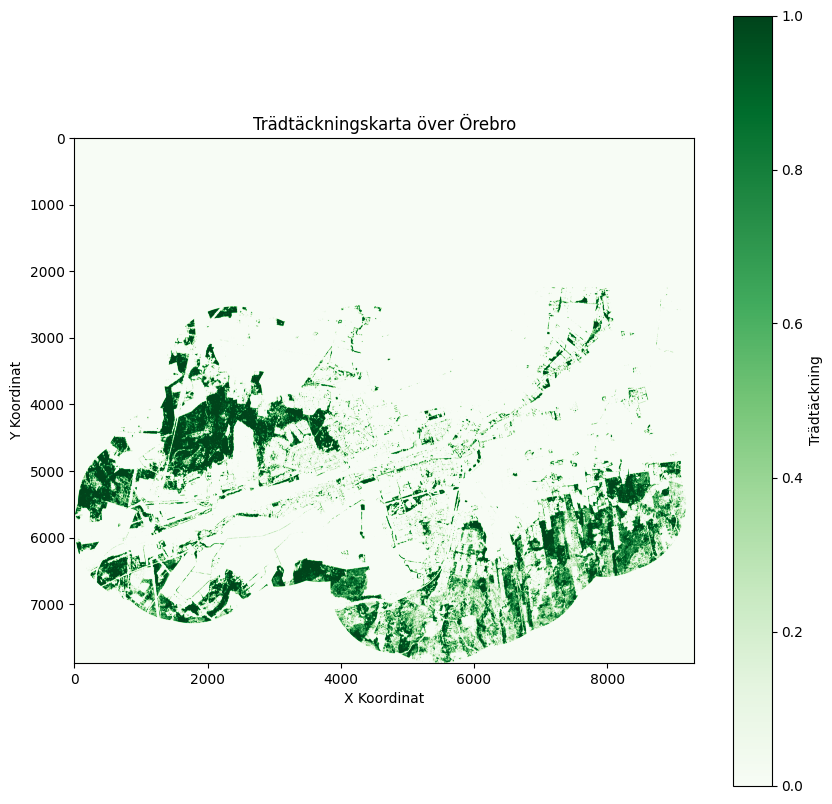

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Ladda in tr√§dt√§ckningsdata (GeoTIFF) med rasterio
tree_cover_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/tradtackning_binar3m_√ñrebro.tif'
with rasterio.open(tree_cover_path) as src:
    tree_cover_array = src.read(1)  # L√§s f√∂rsta bandet

# Visa tr√§dt√§ckningsdatat som en bild
plt.figure(figsize=(10, 10))
plt.imshow(tree_cover_array, cmap='Greens')
plt.colorbar(label='Tr√§dt√§ckning')
plt.title('Tr√§dt√§ckningskarta √∂ver √ñrebro')
plt.xlabel('X Koordinat')
plt.ylabel('Y Koordinat')
plt.show()

# Prompten nedan anv√§ndes f√∂r att skapa denna visualisering:
# 1. Importera n√∂dv√§ndiga bibliotek (rasterio och matplotlib.pyplot).
# 2. Ladda in GeoTIFF-filen med tr√§dt√§ckningsdata med rasterio.open.
# 3. L√§s det f√∂rsta bandet fr√•n rasterdatat f√∂r att f√• tr√§dt√§ckningen.
# 4. Anv√§nd matplotlib f√∂r att skapa en bild av tr√§dt√§ckningsdatat.
# 5. St√§ll in f√§rgschemat till 'Greens' f√∂r att representera tr√§dt√§ckningen.
# 6. L√§gg till en f√§rgskala f√∂r att tolka tr√§dt√§ckningsv√§rden.
# 7. Titel, X- och Y-axel etiketter l√§ggs till f√∂r tydlighet.
# 8. Visa visualiseringen.


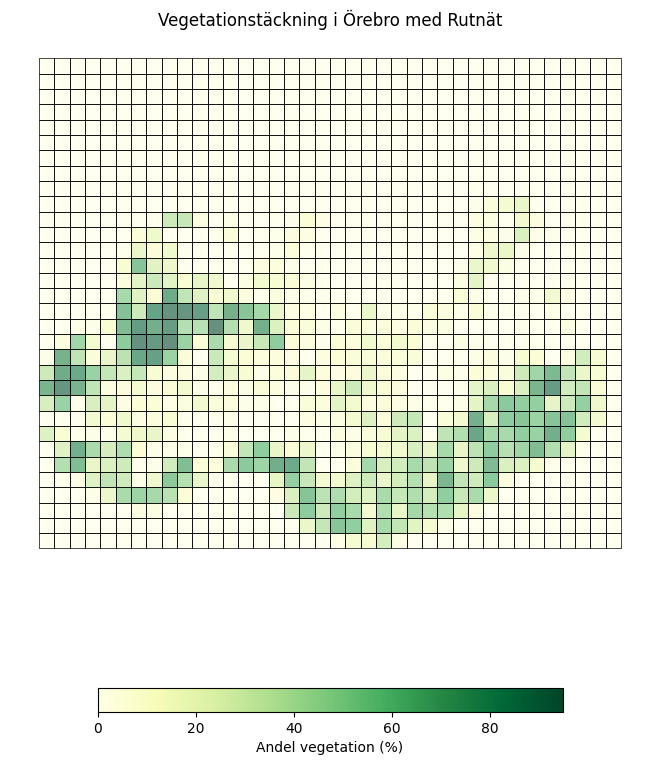

In [9]:
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Ladda in tr√§dt√§ckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_√ñrebro.tif'

raster = rasterio.open(raster_path)

# Define grid size (250 meters in this case)
grid_size = 250

# Calculate the number of grid cells in x and y directions
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))

# Create grid cells
grid_cells = []
for i in range(num_cells_x):
    for j in range(num_cells_y):
        x1 = raster.bounds.left + i * grid_size
        x2 = raster.bounds.left + (i + 1) * grid_size
        y1 = raster.bounds.top - j * grid_size
        y2 = raster.bounds.top - (j + 1) * grid_size
        grid_cells.append(box(x1, y2, x2, y1))

# Convert to GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Function to calculate vegetation coverage
def calculate_coverage(raster, grid_cell):
    # Read the raster data within the grid cell
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)

    # Calculate percentage of pixels with value 1 (vegetation)
    vegetation_pixels = np.sum(data == 1)
    total_pixels = data.size
    return (vegetation_pixels / total_pixels) * 100 if total_pixels > 0 else 0

# Apply the function to each grid cell
grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Plotting the result with grid lines and adjusted legend
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
grid_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
ax.set_title('Vegetationst√§ckning i √ñrebro med Rutn√§t')
ax.set_axis_off()

# Save the plot as an image file
output_file_path = 'output_file_path_with_grid.png'  # Replace with your desired file path
fig.savefig(output_file_path, bbox_inches='tight')

# Load the road data and transform to the raster's CRS
roads_path = '/mnt/data/hallsberg_roads.geojson'
roads_gdf = gpd.read_file(roads_path).to_crs(grid_gdf.crs)

# Plotting the result with roads
fig, ax = plt.subplots(figsize=(12, 8))
grid_gdf.plot(column='vegetation_percentage', cmap='Greens', ax=ax, legend=True)
roads_gdf.plot(ax=ax, color='red', linewidth=1)
ax.set_title('Vegetation Coverage in √ñrebro with Roads')
ax.set_axis_off()
plt.show()

# Instructions to recreate the map:
# 1. Replace 'path_to_your_raster_file.tif' with the path to your raster file.
# 2. If needed, adjust the grid_size variable to change the size of the grid cells.
# 3. Run the script to generate and save the vegetation coverage map.
# 4. The output image will be saved to the path specified in 'output_file_path'.

# "Skapa ett Python-skript f√∂r att analysera en rasterfil med vegetationst√§ckning. Rasterfilen ('tradtackning_binar3m_√ñrebro.tif') inneh√•ller pixelv√§rden d√§r 1 representerar vegetation √∂ver 3 meter och 0 annars. Skriptet ska g√∂ra f√∂ljande:
# 1. L√§sa in rasterfilen.
# 2. Skapa ett rutn√§t med rutor p√• 250x250 meter.
# 3. Ber√§kna f√∂r varje ruta i rutn√§tet den procentuella andelen av pixlar med v√§rdet 1 (vegetation).
# 4. Skapa en tematisk karta som visar dessa procentandelar, d√§r omr√•den med h√∂gre andel vegetation visas i m√∂rkare gr√∂na nyanser.
# 5. Spara kartan som en bildfil.
# Inkludera kommentarer i skriptet f√∂r varje steg och instruktioner f√∂r hur man k√∂r skriptet och anpassar det f√∂r andra rasterfiler."



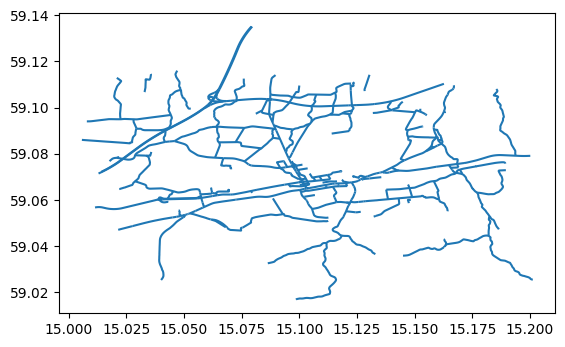

In [18]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# API URL
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"

# Anropa Overpass API
response = requests.get(url)
data = response.json()

# Extrahera noder och v√§gar
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

# Skapa geodata
geometries = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))

# Skapa en GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)

# Skapa en karta
gdf.plot()
plt.show()

# [out:json][timeout:25];
# // Samla st√∂rre v√§gar inom det specificerade omr√•det
# (
#   way["highway"~"motorway|trunk|primary|secondary|tertiary|unclassified"]
#     (59.038695,15.021816,59.109342,15.184407);  // Anv√§nder de omvandlade WGS 84-koordinaterna
# );
# // Skriv ut resultatet
# out body;
# >;
# out skel qt;



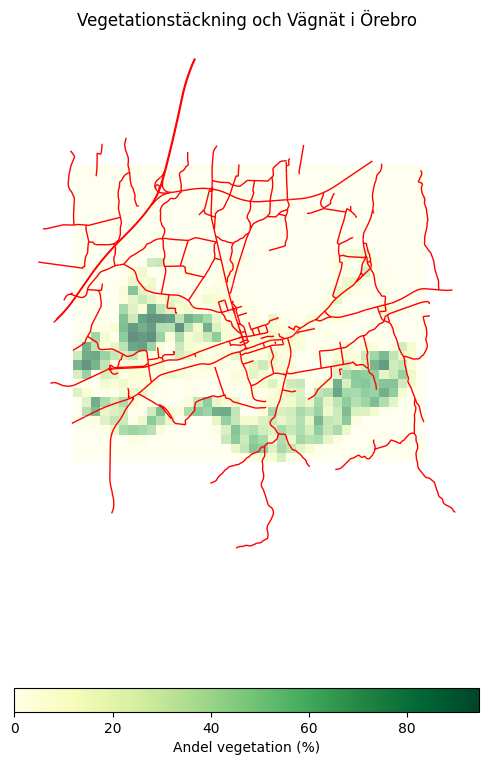

In [19]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in tr√§dt√§ckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_√ñrebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutn√§t baserat p√• rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Ber√§kna vegetationst√§ckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API f√∂r v√§gdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta v√§gdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = [LineString([nodes[node_id] for node_id in way['nodes']]) for way in ways]
roads_gdf = gpd.GeoDataFrame(geometry=geometries, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp b√•de vegetation och v√§gar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})
roads_gdf.plot(ax=ax, color='red', linewidth=1)

ax.set_title('Vegetationst√§ckning och V√§gn√§t i √ñrebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


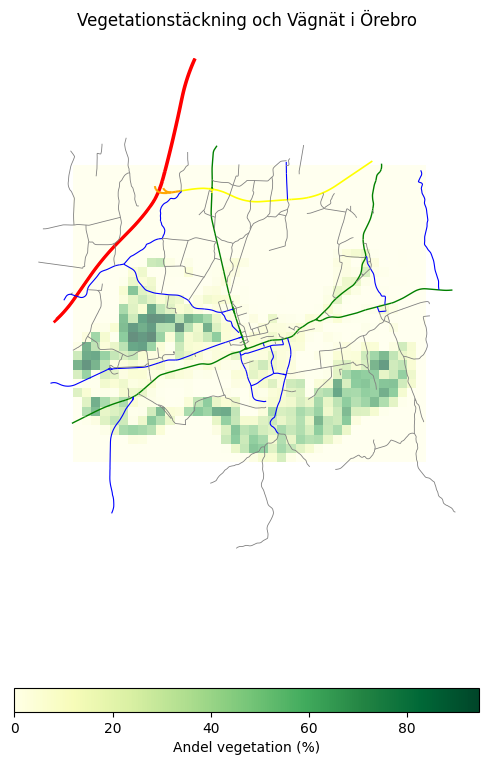

In [20]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, box
import numpy as np
import rasterio

# Ladda in tr√§dt√§ckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_√ñrebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutn√§t baserat p√• rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Ber√§kna vegetationst√§ckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API f√∂r v√§gdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta v√§gdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']

geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# Rita upp b√•de vegetation och v√§gar med olika f√§rger och tjocklekar beroende p√• v√§gtyp
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

# V√§ginst√§llningar
road_colors = {'motorway': 'red', 'trunk': 'orange', 'primary': 'yellow', 'secondary': 'green', 'tertiary': 'blue', 'unclassified': 'grey', 'unknown': 'black'}
road_widths = {'motorway': 2, 'trunk': 1.5, 'primary': 1.2, 'secondary': 1, 'tertiary': 0.8, 'unclassified': 0.6, 'unknown': 0.4}

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationst√§ckning och V√§gn√§t i √ñrebro')
ax.set_axis_off()
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


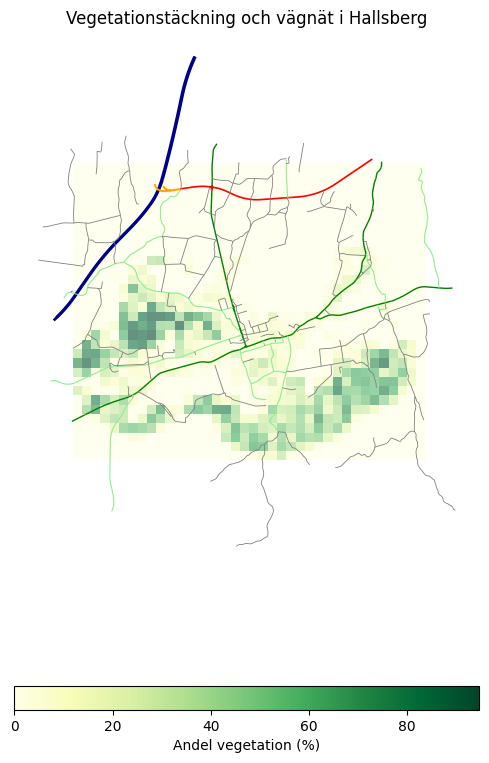

In [23]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, LineString
import requests

# Ladda in tr√§dt√§ckningsdata (GeoTIFF)
raster_path = '/content/sample_data/tradtackning_binar3m_√ñrebro.tif'
raster = rasterio.open(raster_path)

# Skapa rutn√§t baserat p√• rasterdata
grid_size = 250
num_cells_x = int(np.ceil((raster.bounds.right - raster.bounds.left) / grid_size))
num_cells_y = int(np.ceil((raster.bounds.top - raster.bounds.bottom) / grid_size))
grid_cells = [box(raster.bounds.left + i * grid_size, raster.bounds.top - j * grid_size,
                  raster.bounds.left + (i + 1) * grid_size, raster.bounds.top - (j + 1) * grid_size)
              for i in range(num_cells_x) for j in range(num_cells_y)]
grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=raster.crs)

# Ber√§kna vegetationst√§ckning
def calculate_coverage(raster, grid_cell):
    window = rasterio.windows.from_bounds(*grid_cell.bounds, transform=raster.transform)
    data = raster.read(1, window=window)
    return (np.sum(data == 1) / data.size) * 100 if data.size > 0 else 0

grid_gdf['vegetation_coverage'] = grid_gdf['geometry'].apply(lambda x: calculate_coverage(raster, x))

# Anropa Overpass API f√∂r v√§gdata
url = "https://overpass-api.de/api/interpreter?data=[out:json][timeout:25];way[\"highway\"~\"motorway|trunk|primary|secondary|tertiary|unclassified\"](59.038695,15.021816,59.109342,15.184407);out body;>;out skel qt;"
response = requests.get(url)
data = response.json()

# Bearbeta v√§gdata
nodes = {node['id']: (node['lon'], node['lat']) for node in data['elements'] if node['type'] == 'node'}
ways = [way for way in data['elements'] if way['type'] == 'way']
geometries = []
road_types = []
for way in ways:
    points = [nodes[node_id] for node_id in way['nodes']]
    geometries.append(LineString(points))
    road_types.append(way['tags'].get('highway', 'unknown'))

# Skapa en GeoDataFrame f√∂r v√§garna
roads_gdf = gpd.GeoDataFrame({'geometry': geometries, 'highway': road_types}, crs="EPSG:4326").to_crs(grid_gdf.crs)

# V√§ginst√§llningar
road_colors = {
    'motorway': 'darkblue',
    'trunk': 'orange',
    'primary': 'red',
    'secondary': 'green',
    'tertiary': 'lightgreen',
    'unclassified': 'grey',
    'unknown': 'black'
}
road_widths = {
    'motorway': 2,
    'trunk': 1.5,
    'primary': 1.2,
    'secondary': 1,
    'tertiary': 0.8,
    'unclassified': 0.6,
    'unknown': 0.4
}

# Rita upp b√•de vegetation och v√§gar
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf.plot(column='vegetation_coverage', ax=ax, cmap='YlGn', alpha=0.6, legend=True,
              legend_kwds={'label': "Andel vegetation (%)", 'orientation': "horizontal", 'shrink': 0.5})

for road_type in road_colors.keys():
    subset = roads_gdf[roads_gdf['highway'] == road_type]
    subset.plot(ax=ax, color=road_colors[road_type], linewidth=road_widths[road_type])

ax.set_title('Vegetationst√§ckning och v√§gn√§t i Hallsberg')
ax.set_axis_off()
plt.show()


# SMHI

## Hydrologi

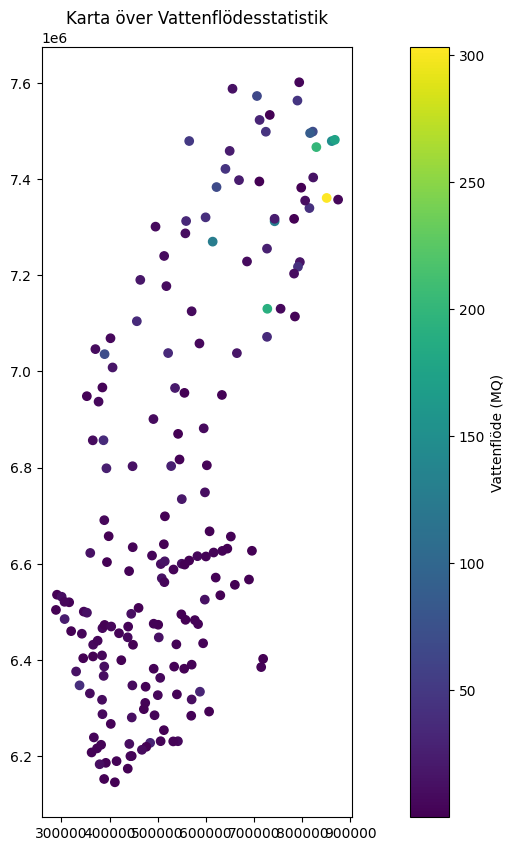

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# L√§s in Excel-filen med vattenfl√∂desstatistiken
statistik_df = pd.read_excel('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Statistik_vattenwebb_201604.xls', sheet_name='Statistik')

# L√§s in Shapefilen
gdf = gpd.read_file('https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/Hyd_grundnat_SMHI_2020.shp')

# Matcha stationerna baserat p√• stationsnummer
# Antag att 'Stationsnummer' finns b√•de i statistikfilen och Shapefilen
merged_data = gdf.merge(statistik_df, left_on='StationsNr', right_on='Stationsnummer')

# V√§lj en fl√∂desparameter att visualisera, t.ex. 'MQ'
parameter_to_visualize = 'MQ'

# Kontrollera att vald parameter finns i datam√§ngden
if parameter_to_visualize in merged_data.columns:
    # Skapa en karta
    fig, ax = plt.subplots(figsize=(15, 10))
    merged_data.plot(column=parameter_to_visualize, ax=ax, legend=True,
                     legend_kwds={'label': f"Vattenfl√∂de ({parameter_to_visualize})"},
                     cmap='viridis')
    plt.title('Karta √∂ver Vattenfl√∂desstatistik')
    plt.show()
else:
    print(f"Parameter '{parameter_to_visualize}' finns inte i datam√§ngden.")


## Oceanografi

<ipython-input-2-ed4cc65549dc>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';', header=4)
<ipython-input-2-ed4cc65549dc>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_seasonal = data.groupby(['S√§song', '√Ör']).mean().reset_index()


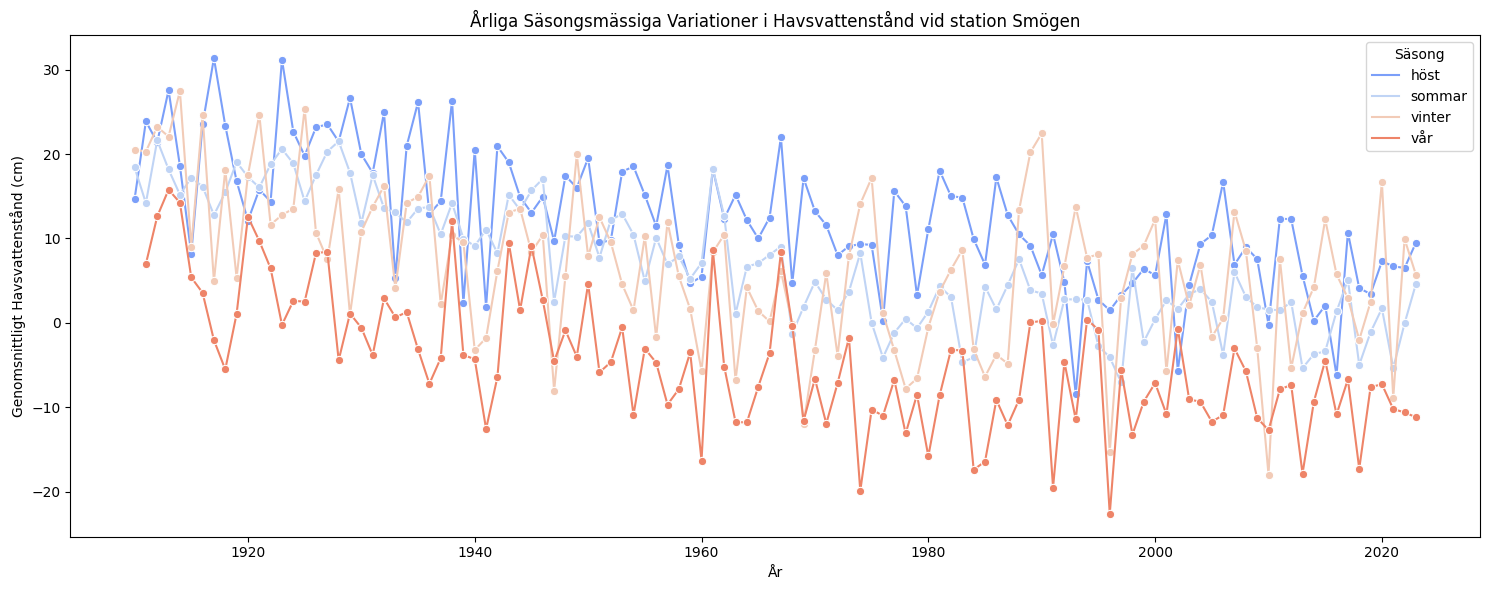

In [ ]:
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laddar in CSV-filen
file_path = 'https://github.com/soleildeminuit/AI-Samhallsplanering-Course/raw/main/data/raw/smhi-opendata_6_2111_20231122_152831.csv'
data = pd.read_csv(file_path, sep=';', header=4)

# Konverterar 'Datum Tid (UTC)' till datetime och 'Havsvattenst√•nd' till numeriska v√§rden
data['Datum Tid (UTC)'] = pd.to_datetime(data['Datum Tid (UTC)'])
data['Havsvattenst√•nd'] = pd.to_numeric(data['Havsvattenst√•nd'], errors='coerce')

# Tar bort rader med NaN-v√§rden i 'Havsvattenst√•nd'
data.dropna(subset=['Havsvattenst√•nd'], inplace=True)

# Funktion f√∂r att tilldela s√§song baserat p√• m√•nad
def assign_season(month):
    if month in [12, 1, 2]:
        return 'vinter'
    elif month in [3, 4, 5]:
        return 'v√•r'
    elif month in [6, 7, 8]:
        return 'sommar'
    else:
        return 'h√∂st'

# Till√§mpar funktionen f√∂r att skapa en ny kolumn 'S√§song' baserat p√• m√•nad
data['S√§song'] = data['Datum Tid (UTC)'].dt.month.apply(assign_season)

# L√§gger till kolumner f√∂r √•r och m√•nad f√∂r enklare gruppering
data['√Ör'] = data['Datum Tid (UTC)'].dt.year
data['M√•nad'] = data['Datum Tid (UTC)'].dt.month

# Grupperar data efter s√§song och √•r, och ber√§knar medelv√§rdet f√∂r varje grupp
data_seasonal = data.groupby(['S√§song', '√Ör']).mean().reset_index()

# Skapar en tidsserieplot f√∂r s√§songsm√§ssiga variationer
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_seasonal, x='√Ör', y='Havsvattenst√•nd', hue='S√§song', palette='coolwarm', marker='o')
plt.title('√Örliga S√§songsm√§ssiga Variationer i Havsvattenst√•nd vid station Sm√∂gen')
plt.xlabel('√Ör')
plt.ylabel('Genomsnittligt Havsvattenst√•nd (cm)')
plt.legend(title='S√§song')
plt.tight_layout()

# Visar plotten
plt.show()
# ChatGPT-4
# https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer#param=sealevelrh2000,stations=core,stationid=2111
# Kan du ge mig den exakta prompten till dig som beh√∂vs f√∂r att du ska kunna √•terskapa exakt detta diagrem?

# ChatGPT
# F√∂r att jag ska kunna √•terskapa exakt samma diagram som visar de √•rliga s√§songsm√§ssiga variationerna i havsvattenst√•ndet vid station Sm√∂gen, kan du anv√§nda f√∂ljande prompt:

# "Anv√§nd den bifogade CSV-filen med havsvattenst√•ndsdata fr√•n station Sm√∂gen f√∂r att skapa ett diagram. Rensa och f√∂rbered datan genom att konvertera 'Datum Tid (UTC)' till datetime och 'Havsvattenst√•nd' till numeriska v√§rden.
# Kategorisera sedan varje datapunkt i en s√§song baserat p√• m√•naden och ber√§kna genomsnittliga havsvattenst√•ndet f√∂r varje s√§song och √•r.
# Skapa ett linjediagram som visar dessa genomsnittliga havsvattenst√•nd √∂ver √•ren, d√§r varje s√§song representeras med en unik f√§rg och markerad med punkter.
# Titeln p√• diagrammet ska vara '√Örliga S√§songsm√§ssiga Variationer i Havsvattenst√•nd vid station Sm√∂gen'."

# Se till att ocks√• bifoga CSV-filen med havsvattenst√•ndsdata fr√•n station Sm√∂gen n√§r du anv√§nder denna prompt, eftersom datan √§r n√∂dv√§ndig f√∂r att skapa diagrammet.
